In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
sns.set()

%matplotlib inline

In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head(20)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast,description
0,s1,TV Show,3%,NaN,Brazil,8/14/2020,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...","João Miguel, Bianca Comparato, Michel Gomes, R...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,12/23/2016,2016,TV-MA,93 min,"Dramas, International Movies","Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Singapore,12/20/2018,2011,R,78 min,"Horror Movies, International Movies","Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,United States,11/16/2017,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","Elijah Wood, John C. Reilly, Jennifer Connelly...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,United States,1/1/2020,2008,PG-13,123 min,Dramas,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,Turkey,7/1/2017,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries","Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,Egypt,6/1/2020,2019,TV-MA,95 min,"Horror Movies, International Movies","Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,United States,11/1/2019,1997,R,119 min,Dramas,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,India,4/1/2019,2019,TV-14,118 min,"Horror Movies, International Movies","Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,India,12/15/2017,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers","Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",An architect and his wife move into a castle t...


In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
cast            object
description     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  cast          7069 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
cast            6831
description     7769
dtype: int64

In [8]:
df["type"].head()

0    TV Show
1      Movie
2      Movie
3      Movie
4      Movie
Name: type, dtype: object

Text(0.5, 1.0, 'Show Type Count in Netflix dataset')

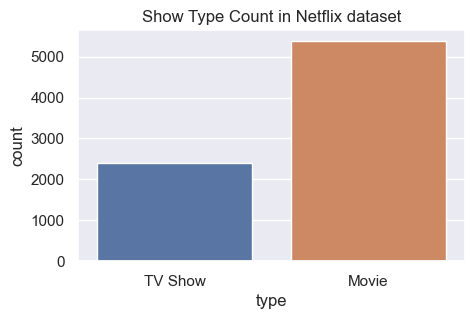

In [9]:
plt.figure(figsize=(5, 3))
sns.countplot(x="type", data=df)
plt.title("Show Type Count in Netflix dataset")

In [10]:
df["title"]

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

In [11]:
countvectorizer = CountVectorizer(stop_words="english")
bow = countvectorizer.fit_transform(df["title"])
bow.toarray(), bow.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 (7787, 8047))

In [12]:
df["director"].isnull().sum()

2389

In [13]:
# pick up directors who directs more than twice.
director_df = df["director"]
director_removed_nan_df = director_df.dropna()
director_removed_nan_df.head()

1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
5          Serdar Akar
Name: director, dtype: object

In [14]:
director_count = {}

for i in director_removed_nan_df.index:
    director_count.setdefault(director_removed_nan_df[i], 0)
    director_count[director_removed_nan_df[i]] += 1

In [15]:
frequent_director_count = {}

for key,value in director_count.items():
    if value >= 6:
        frequent_director_count.setdefault(key, value)

In [16]:
frequent_director_count

{'Kunle Afolayan': 8,
 'Ozan Açıktan': 7,
 'McG': 7,
 'Cathy Garcia-Molina': 13,
 'Justin G. Dyck': 7,
 'Jay Karas': 14,
 'Ram Gopal Varma': 6,
 'Rajkumar Santoshi': 6,
 'Raúl Campos, Jan Suter': 18,
 'Youssef Chahine': 12,
 'Martin Scorsese': 12,
 'Ron Howard': 6,
 'Marcus Raboy': 16,
 'S.S. Rajamouli': 7,
 'Wenn V. Deramas': 6,
 'Omoni Oboli': 7,
 'Hakan Algül': 8,
 'Ryan Polito': 8,
 'Shannon Hartman': 8,
 'Johnnie To': 8,
 'Jay Chapman': 12,
 'Troy Miller': 6,
 'Don Michael Paul': 7,
 'Vlad Yudin': 6,
 'Steven Spielberg': 10,
 'David Dhawan': 9,
 'Lance Bangs': 8,
 'Fernando Ayllón': 7,
 'Anees Bazmee': 6,
 'Joey So': 6,
 'Quentin Tarantino': 8,
 'Yılmaz Erdoğan': 7,
 'Noah Baumbach': 6,
 'Sameh Abdulaziz': 6,
 'Steven Soderbergh': 6,
 'Imtiaz Ali': 6,
 'Sooraj R. Barjatya': 6,
 'Ashutosh Gowariker': 6,
 'Hanung Bramantyo': 6,
 'Robert Rodriguez': 8,
 'Robert Vince': 6,
 'Matt Askem': 6}

In [17]:
sorted_dict = sorted(frequent_director_count.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])

Text(0.5, 0, 'Director(s)')

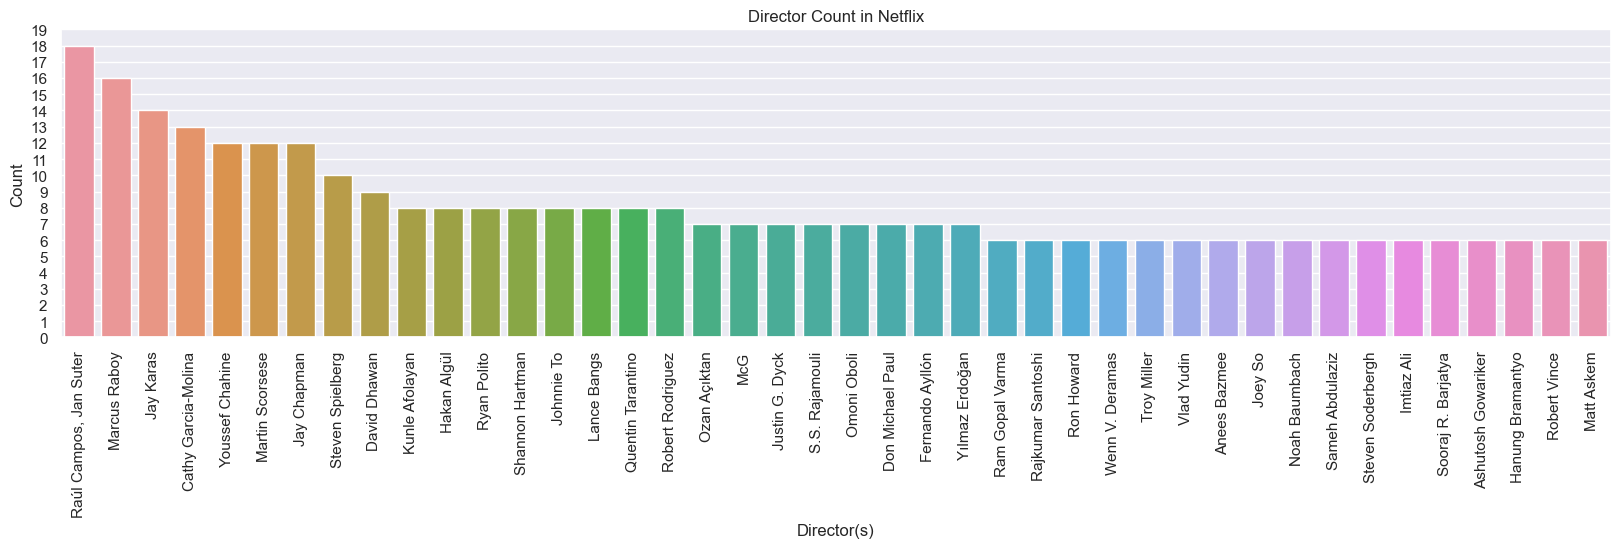

In [18]:
plt.figure(figsize=(20,4))
sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 20, step=1))
plt.title("Director Count in Netflix")
plt.ylabel("Count")
plt.xlabel("Director(s)")

In [19]:
df["country"][0]

'Brazil'

In [20]:
df["country"].dropna()[0].split(",")

['Brazil']

In [21]:
frequent_country = {}

for i in df["country"].dropna().index:
    country_list = df["country"].dropna()[i].split(",")
    for country in country_list:
        frequent_country.setdefault(country, 0)
        frequent_country[country] += 1

In [22]:
sorted_dict = sorted(frequent_country.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])

Text(0.5, 1.0, 'Country Count in Netflix')

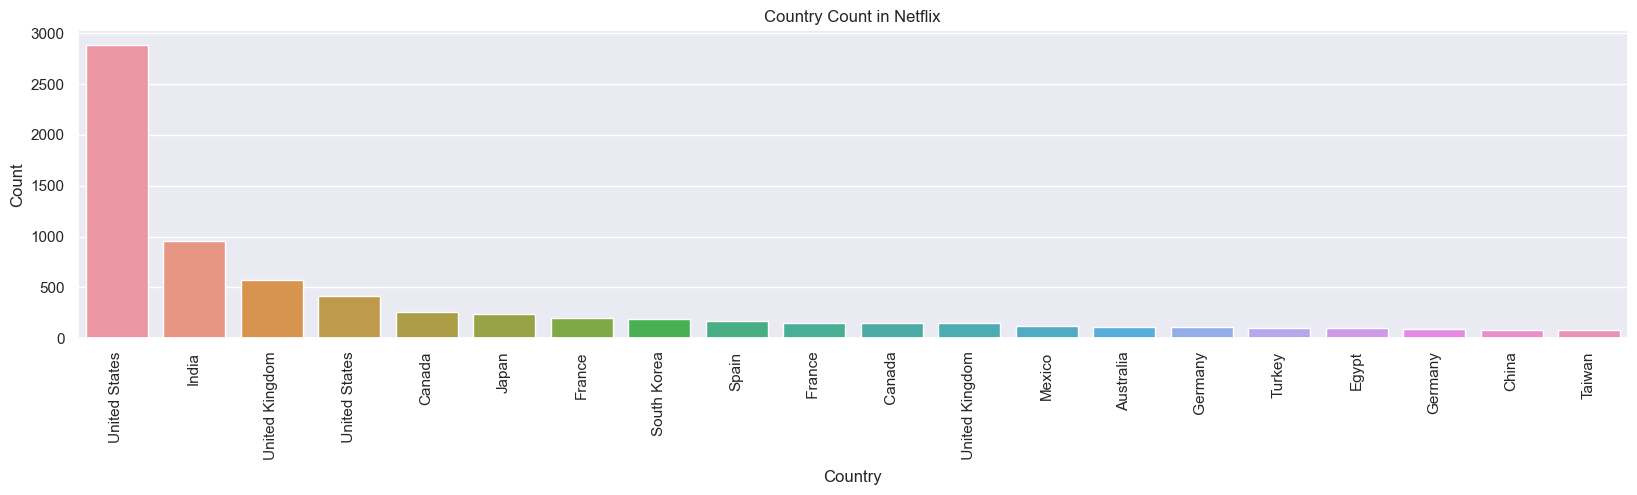

In [23]:
plt.figure(figsize=(20,4))
sns.barplot(x=x[:20], y=y[:20])
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Country Count in Netflix")

In [24]:
df["date_added"]

0        8/14/2020
1       12/23/2016
2       12/20/2018
3       11/16/2017
4         1/1/2020
           ...    
7782    10/19/2020
7783      3/2/2019
7784     9/25/2020
7785    10/31/2020
7786      3/1/2020
Name: date_added, Length: 7787, dtype: object

In [25]:
df["date_added"].isnull().sum()

10

In [26]:
date_count_series = df.groupby("date_added")["show_id"].count()
date_count_series.head()

date_added
 April 15, 2018    1
 April 16, 2019    1
 April 17, 2016    1
 April 20, 2017    1
 April 4, 2017     1
Name: show_id, dtype: int64

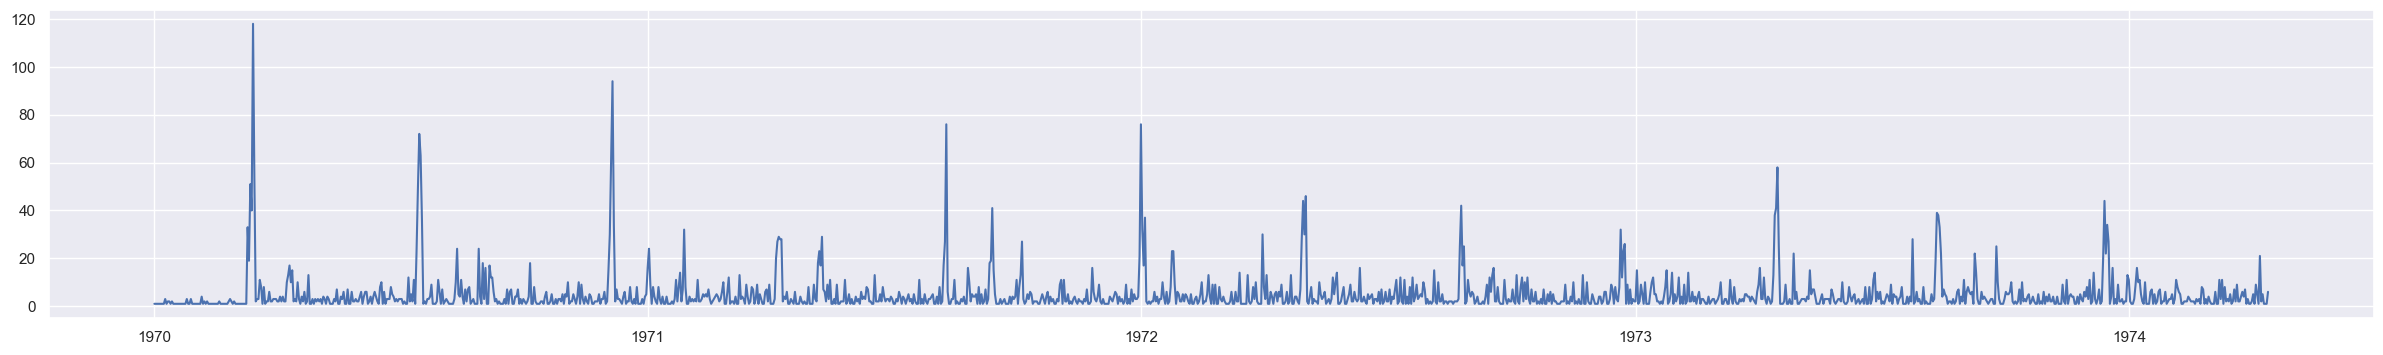

In [27]:
plt.figure(figsize=(30, 4))
plt.plot(date_count_series.index, date_count_series.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

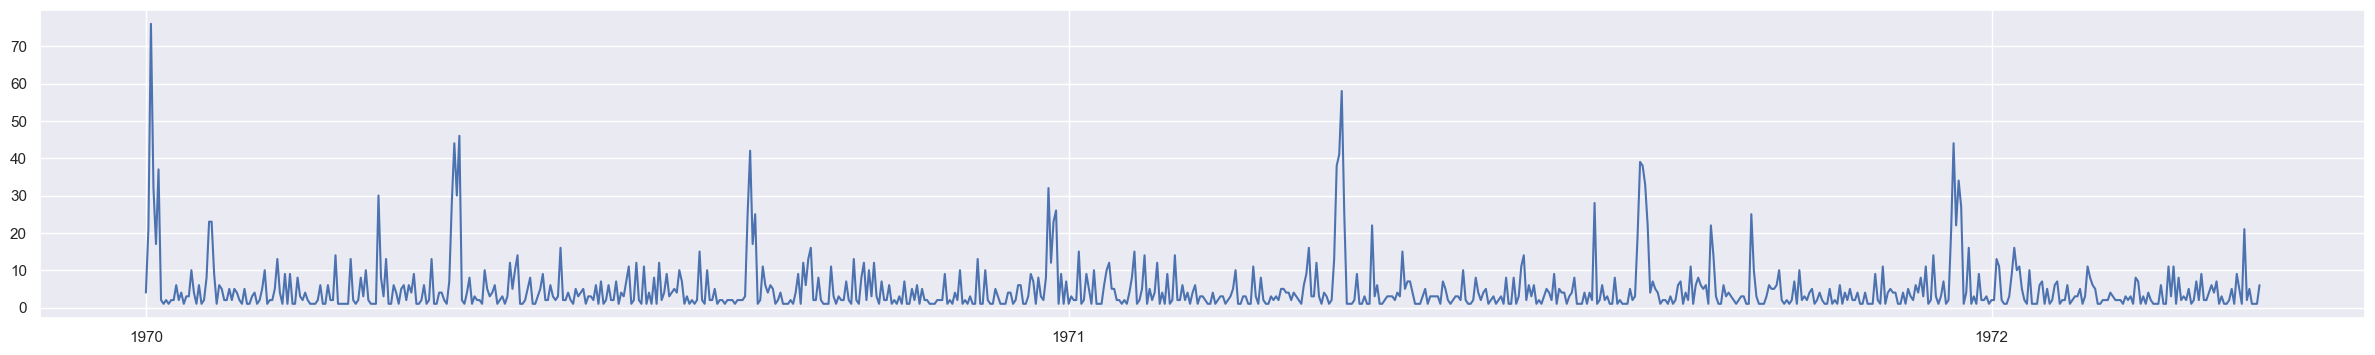

In [28]:
plt.figure(figsize=(30, 4))
plt.plot(date_count_series[date_count_series.index >= "2016-01-01"].index, date_count_series[date_count_series.index >= "2016-01-01"].values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

In [29]:
release_year_series = df.groupby("release_year")["show_id"].count()
release_year_series.index = pd.to_datetime(release_year_series.index, format="%Y")
release_year_series.head(5)

release_year
1925-01-01    1
1942-01-01    2
1943-01-01    3
1944-01-01    3
1945-01-01    3
Name: show_id, dtype: int64

Text(0.5, 0, 'Year')

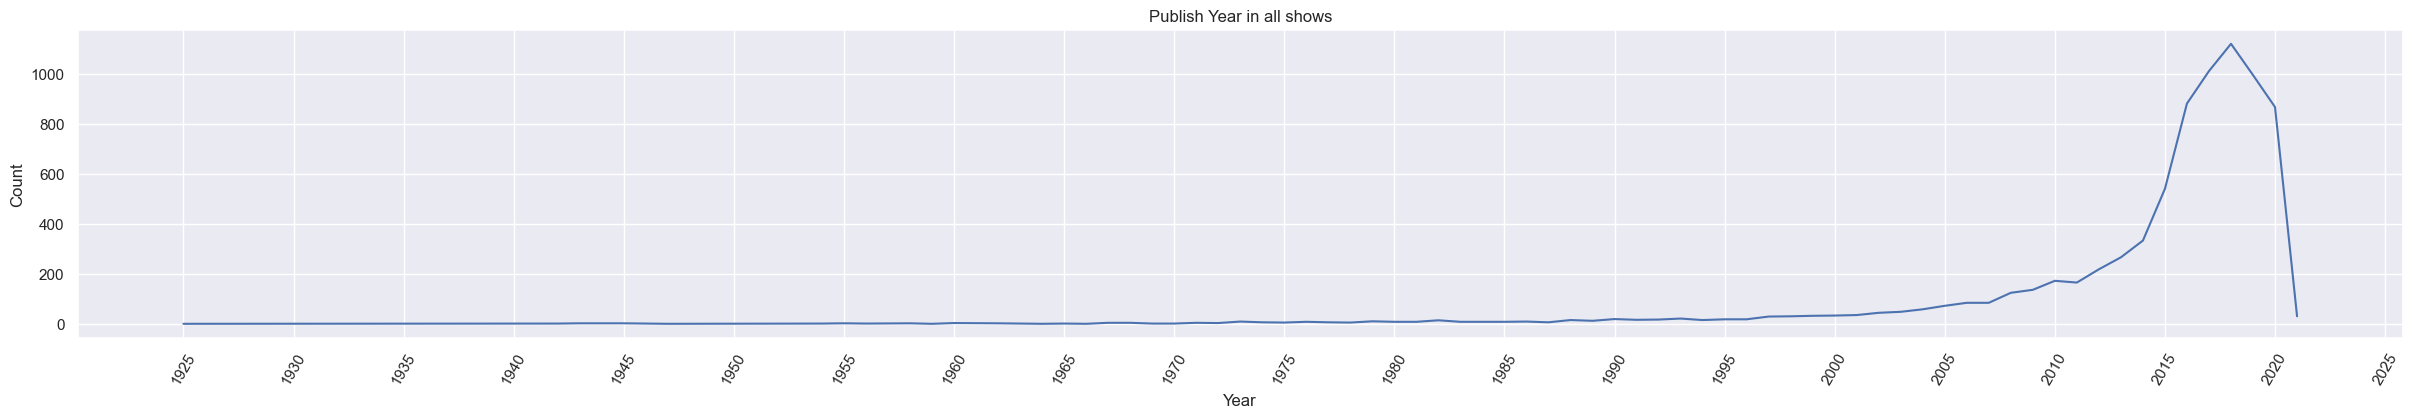

In [30]:
plt.figure(figsize=(30, 4))
plt.plot(release_year_series.index, release_year_series.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xticks(rotation=60)
plt.title("Publish Year in all shows")
plt.ylabel("Count")
plt.xlabel("Year")

In [31]:
df["rating"].nunique()

14

Text(0.5, 1.0, 'Rating Count in Netflix')

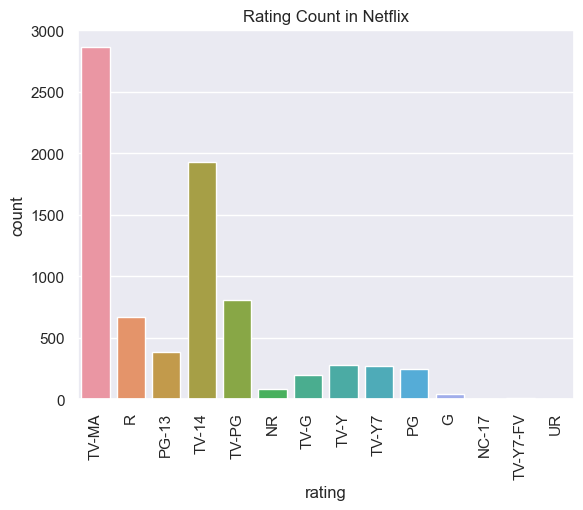

In [32]:
sns.countplot(data=df,x="rating")
plt.xticks(rotation=90)
plt.title("Rating Count in Netflix")

In [33]:
df["duration"]

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object

In [34]:
movie_duration_series = pd.DataFrame(df[df["type"] == "Movie"]["duration"])
movie_duration_series.head(5)

,duration
1,93 min
2,78 min
3,80 min
4,123 min
6,95 min


Text(0.5, 1.0, 'Movies duration histgram in Netflix')

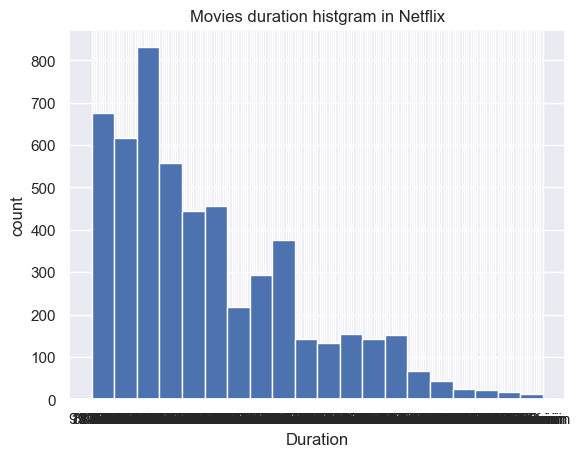

In [35]:
plt.hist(movie_duration_series["duration"], bins=20)
plt.xlabel("Duration")
plt.ylabel("count")
plt.title("Movies duration histgram in Netflix")

Text(0.5, 1.0, 'Relative Frequency Distribution of Movies duration in Netflix')

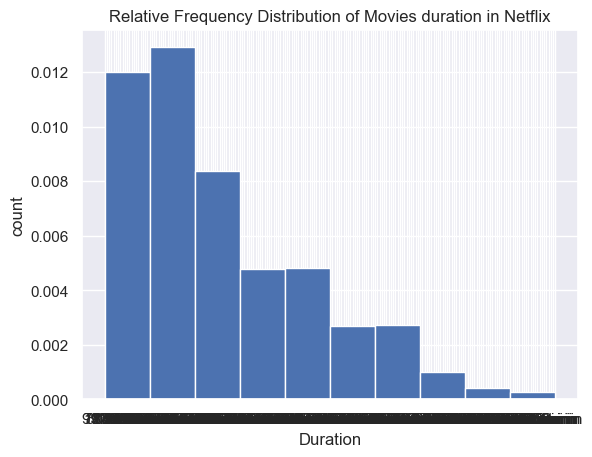

In [36]:
plt.hist(movie_duration_series["duration"], bins=10, density=True)
plt.xlabel("Duration")
plt.ylabel("count")
plt.title("Relative Frequency Distribution of Movies duration in Netflix")

In [37]:
df["listed_in"]

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7785                   International TV Shows, Reality TV
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 7787, dtype: object

In [38]:
frequent_listed_in = {}

for i in df["listed_in"].index:
    listed_in_list = df["listed_in"][i].split(",")
    for listed_in in listed_in_list:
        frequent_listed_in.setdefault(listed_in, 0)
        frequent_listed_in[listed_in] += 1

In [39]:
sorted_dict = sorted(frequent_listed_in.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])

Text(0.5, 1.0, 'Show Type Count in Netflix')

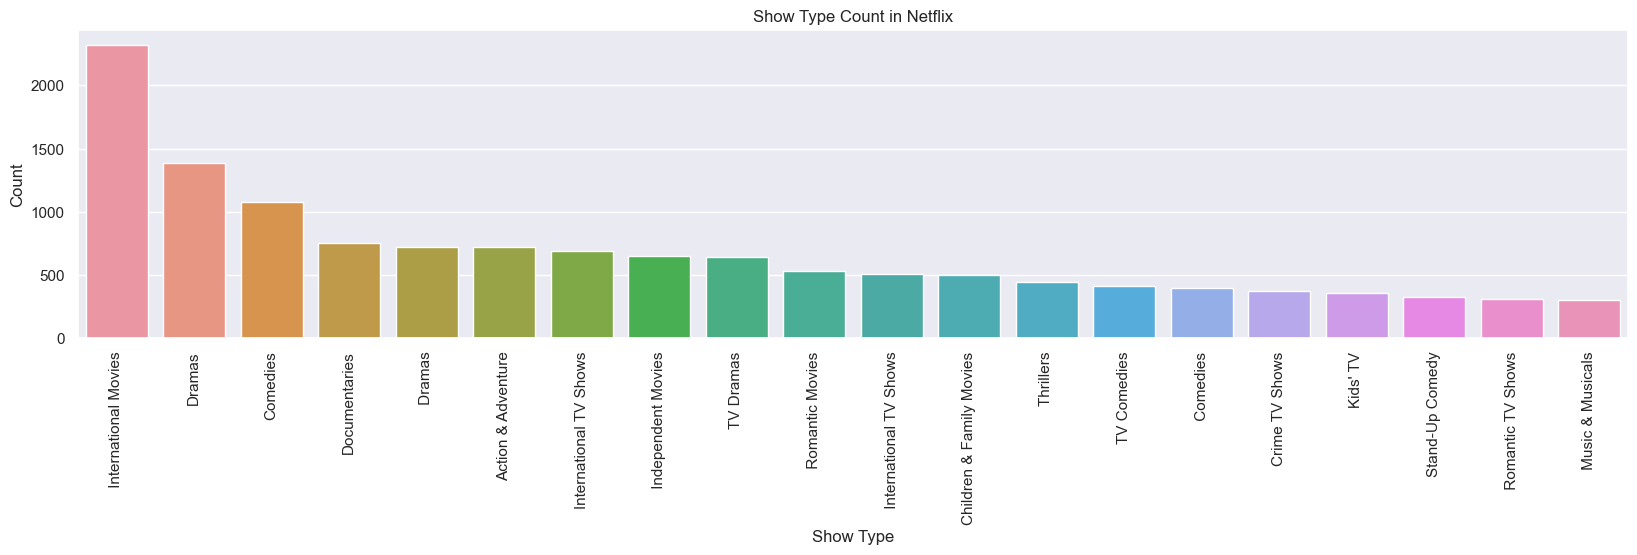

In [40]:
plt.figure(figsize=(20,4))
sns.barplot(x=x[:20], y=y[:20])
plt.xticks(rotation=90)
plt.xlabel("Show Type")
plt.ylabel("Count")
plt.title("Show Type Count in Netflix")

In [41]:
# Example DataFrame (replace this with your actual DataFrame)
data = {'word': ['apple', 'banana', 'orange'],
        'count': [30, 25, 20]}

frequent_word_sorted_df = pd.DataFrame(data)

